# Regression Analysis

## Data Set up

### Import Necessary Libraires and Data

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import seaborn as sns

In [107]:

# read in student math performance data set
student = pd.read_csv('data/student/student-por.csv', sep = ';')
# use G3 as target variable - drop G1 and G2
student = student.drop(['G1', 'G2'], axis = 1)

### Data Investigation and manipulation

In [117]:
student.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G3            0
dtype: int64

In [118]:
student.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000


In [120]:
nom_vars = student.columns[student.dtypes == 'object']
nom_vars_df = student[nom_vars]
nom_vars_df = pd.get_dummies(nom_vars_df, prefix = nom_vars)
student_new = pd.concat([student.drop(nom_vars, axis = 1), nom_vars_df], axis = 1)
student_new.head(10)

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,1,0,0,1,0,1,1,0,1,0
1,17,1,1,1,2,0,5,3,3,1,...,1,0,1,0,0,1,0,1,1,0
2,15,1,1,1,2,0,4,3,2,2,...,1,0,0,1,0,1,0,1,1,0
3,15,4,2,1,3,0,3,2,2,1,...,0,1,0,1,0,1,0,1,0,1
4,16,3,3,1,2,0,4,3,2,1,...,1,0,0,1,0,1,1,0,1,0
5,16,4,3,1,2,0,5,4,2,1,...,0,1,0,1,0,1,0,1,1,0
6,16,2,2,1,2,0,4,4,4,1,...,1,0,0,1,0,1,0,1,1,0
7,17,4,4,2,2,0,4,1,4,1,...,1,0,0,1,0,1,1,0,1,0
8,15,3,2,1,2,0,4,2,2,1,...,1,0,0,1,0,1,0,1,1,0
9,15,3,4,1,2,0,5,5,1,1,...,0,1,0,1,0,1,0,1,1,0


In [124]:
# Set final x and y dataset
y = student_new['G3']
X = student_new.drop(['G3'], axis=1)

[519, 130]

## Run Models

In [108]:
# split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=11)
[y_train.size, y_test.size]

NameError: name 'X' is not defined

In [170]:
scores_ada = []
for learning in [1, 0.5, 0.25, 0.1, 0.05, 0.01]:
    for n in [1, 2, 4, 8, 16, 32, 64, 100, 200]:
        clf_a = AdaBoostRegressor(n_estimators=n, learning_rate=learning, random_state=0)
        clf_a.fit(X_train, y_train)
        score = clf_a.score(X_test,y_test)
        scores_ada.append([score, learning, n])

In [176]:
scores_ada_df = pd.DataFrame(scores_ada)
scores_ada_df.columns = ['r_sq', 'learn_rate', 'n_estimatores']
learn_avg = scores_ada_df.groupby('learn_rate', as_index=False).mean()[['learn_rate','r_sq']]
n_avg = scores_ada_df.groupby('n_estimatores', as_index=False).mean()[['n_estimatores','r_sq']]
max_r_sq = scores_ada_df['r_sq'].max()
best_fit = scores_ada_df.loc[scores_ada_df['r_sq'] == max_r_sq]
print(best_fit)

        r_sq  learn_rate  n_estimatores
30  0.208279         0.1              8


In [177]:
min_r_sq = scores_ada_df['r_sq'].min()
worst_fit = scores_ada_df.loc[scores_ada_df['r_sq'] == min_r_sq]
print(worst_fit)

        r_sq  learn_rate  n_estimatores
0   0.023776        1.00              1
1   0.023776        1.00              2
9   0.023776        0.50              1
10  0.023776        0.50              2
18  0.023776        0.25              1
19  0.023776        0.25              2
27  0.023776        0.10              1
28  0.023776        0.10              2
36  0.023776        0.05              1
37  0.023776        0.05              2
45  0.023776        0.01              1


In [159]:
scores_grad = []
for depth in [1,2,3,4,5]:
    for learning in [1, 0.5, 0.25, 0.1, 0.05, 0.01]:
        for n in [1, 2, 4, 8, 16, 32, 64, 100, 200]:
#             clf_g = GradientBoostingRegressor(n_estimators=n, learning_rate=learning, max_depth=depth, random_state=0)
#             scores_g = cross_val_score(clf_g, X, y.values.ravel(), cv=5)
#             score = np.absolute(scores_g).mean()
#             print(scores_g, score)
#             scores_grad.append([score,depth, learning, n])
            clf_g = GradientBoostingRegressor(n_estimators=n, learning_rate=learning, max_depth=depth, random_state=0)
            clf_g.fit(X_train, y_train)
            score = clf_g.score(X_test,y_test)
            scores_grad.append([score,depth, learning, n])

In [160]:
scores_grad_df = pd.DataFrame(scores_grad)
scores_grad_df.columns = ['r_sq','depth', 'learn_rate', 'n_estimatores']
scores_grad_df
depth_avg = scores_grad_df.groupby('depth', as_index=False).mean()[['depth','r_sq']]
learn_avg = scores_grad_df.groupby('learn_rate', as_index=False).mean()[['learn_rate','r_sq']]
n_avg = scores_grad_df.groupby('n_estimatores', as_index=False).mean()[['n_estimatores','r_sq']]
max_r_sq = scores_grad_df['r_sq'].max()
best_fit = scores_grad_df.loc[scores_grad_df['r_sq'] == max_r_sq]
print(best_fit)

        r_sq  depth  learn_rate  n_estimatores
55  0.241921      2         1.0              2


In [163]:
min_r_sq = scores_grad_df['r_sq'].min()
worst_fit = scores_grad_df.loc[scores_grad_df['r_sq'] == min_r_sq]
print(worst_fit)

         r_sq  depth  learn_rate  n_estimatores
224 -0.618708      5         1.0            200


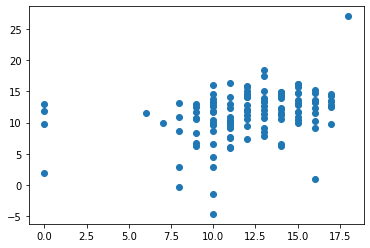

In [178]:
clf_g2 = GradientBoostingRegressor(n_estimators=200, learning_rate=1, max_depth=5, random_state=0)
clf_g2.fit(X_train, y_train)
predictions = clf_g2.predict(X_test)
plt.scatter(y_test,predictions)

In [138]:
scores_grad

[[0.13538406946451131, 1, 1, 1],
 [0.13869901560215725, 1, 1, 2],
 [0.1927353373972276, 1, 1, 4],
 [0.16300994067517083, 1, 1, 8],
 [0.12726471677880347, 1, 1, 16],
 [0.08727272570944289, 1, 1, 32],
 [0.12299667680999704, 1, 1, 64],
 [0.1423699600961349, 1, 1, 100],
 [0.1504767306719592, 1, 1, 200],
 [0.11646313742073332, 1, 0.5, 1],
 [0.13468853667149716, 1, 0.5, 2],
 [0.1847540329303983, 1, 0.5, 4],
 [0.2016007737749399, 1, 0.5, 8],
 [0.17919552179796686, 1, 0.5, 16],
 [0.16965267963706765, 1, 0.5, 32],
 [0.16330812436106246, 1, 0.5, 64],
 [0.15269461729026235, 1, 0.5, 100],
 [0.15837977835835482, 1, 0.5, 200],
 [0.06970529554878957, 1, 0.25, 1],
 [0.10710476294337566, 1, 0.25, 2],
 [0.1360152562948741, 1, 0.25, 4],
 [0.17783939176393815, 1, 0.25, 8],
 [0.19985163793170668, 1, 0.25, 16],
 [0.1918663481494566, 1, 0.25, 32],
 [0.18084852721397213, 1, 0.25, 64],
 [0.17262090993648926, 1, 0.25, 100],
 [0.16691198271120777, 1, 0.25, 200],
 [0.029715430153605782, 1, 0.1, 1],
 [0.0547835138